# 파이썬 OpenCV를 이용한 영상처리_허진경

* **Jupyter Notebook Info**
>- Dayoung Yun
>- 2021/11/17

## 1장. 영상처리 개요
### 이미지표현
>- 정지영상(이미지) : 문자, 도형 등을 포함한 2진 영상, 흑백사진,모노크롬영상(흑백영상), 컬러영상, 멀티스펙트럼(다중분광)
>- 동영상 : 흑백동영상, 컬러동영상

### 디지털 이미지와 좌표표현방법
>- 영상처리 : 영상을 디지털 이미지로 변환해서 컴퓨터를 이용해 처리하는 것
>- 사진, 도형 등의 아날로그 이미지를 컴퓨터에 저장한 디지털 이미지(2차원 배열구조)로 변환
>- (height, width) = image.shape
>- 표본화 = 해상도
>- 양자화 = 이미지의 농담을 이산적인 정수값으로 조작하는 것

## OpenCV와 이미지 읽기
### OpenCV
>- Open Source Computer Vision
>- 전통적인 영상처리 알고리즘 및 최첨단 컴퓨터 비전과 머신러닝/딥러닝 알고리즘들을 포함
>- 얼굴을 감지 및 인식, 물체 식별, 비디오에서 인간의 행동을 분류, 카메라의 움직임을 추적, 움직이는 물체를 추적, 물체의 3D모델 추출, 스테레오 카메라에서 3D 포인트 클라우드를 생성, 이미지를 결합하여 고해상도를 생성하는데 사용
>- 전체 장면의 이미지, 이미지데이터베이스에서 유사한 이미지 찾기, 적목현상제거, 눈의 추적, 풍경인식 , 증강 현실 오버레이를 위한 마커 설정


### OpenCV 설치
>- cv2.IMREAD(fileName, flags) -> img
>- cv2.IMREAD_COLOR : 이미지파일을 컬러로 읽기
>- cv2.IMREAD_GRAYSCALE 
>- cv2.IMREAD_UNCHANGED : 불투명도

In [1]:
! pip install opencv-contrib-python

You should consider upgrading via the 'c:\users\com\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import cv2

In [3]:
cv2.__version__

'4.5.4-dev'

In [4]:
tori_ima = cv2.imread('Tori.jpg')
print(tori_ima.shape)

(178, 283, 3)


In [5]:
tori_gray = cv2.imread('Tori.jpg', cv2.IMREAD_GRAYSCALE)
print(tori_gray.shape)

(178, 283)


### cv2.imshow(title, image)로 이미지 출력하기
>- cv2.waitKey() : 키보드 입력을 대기하는 함수
>- cv2.destroyAllWindows() : 화면에 나타난 모든 윈도우 종료



In [6]:
import cv2


fname = 'Tori.jpg'
color = cv2.imread(fname, cv2.IMREAD_COLOR)
grayscale = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
unchanged = cv2.imread(fname, cv2.IMREAD_UNCHANGED)

cv2.imshow('Color', color)
cv2.imshow('Grayscale', grayscale)
cv2.imshow('Unchanged', unchanged)

### cv2.imwrite()로 이미지 저장하기
>- cv2.imwrite(fileName, image) -> retval


In [7]:
import cv2

img = cv2.imread('Tori.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imwrite('Torii_.png', img)


True

### Matplotlib 사용해서 이미지 출력하기
>- matplotlib.pyplot모듈의 imshow()함수는 n-차원 배열을 화면에 이미지로 출력
>- matplotlib.pyplot.imshow(image)

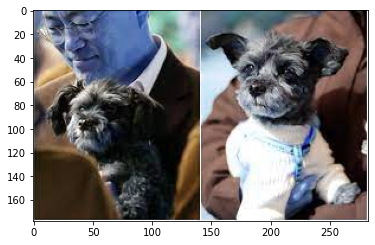

In [8]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('Tori.jpg', cv2.IMREAD_COLOR)

plt.imshow(img)
plt.show()

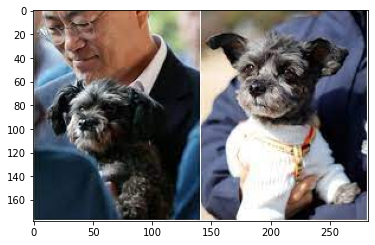

In [9]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('Tori.jpg', cv2.IMREAD_COLOR)

b, g, r = cv2.split(img)
img2 = cv2.merge([r,g,b])

#img2 = cv2.cvtColor(img, cv2.Color_BGR2RGB)

plt.imshow(img2)
plt.show()

## 디지털 화상과 컬러
### 이진화상
>- 화소를 흰색, 검은색만 표현이 되는 영상, 검은색 : 0, 흰색 : 255
>- 원본이미지 역치를 이요해 만드는 것 -> 밀도를 조절하여 밝기를 표현한 디더링 화상

### 회색조 화상
>- 화소당 8비트, 즉 256단계의 명암 표현

### 컬러화상
>- RGB모델 : 8비트씩 R,G,B = 24비트, 트루컬러이미지 cf) Opencv (B,G,R)
>- HSV모델 : 색상(Hue), 채도(Saturation), 명도(Value)를 이용해 컬러를 표현
>- YUV모델 : Y ,밝기(Luma)에 더 민감하고, U,V (2개의 색차): 색상(크로마)에는 더 둔감한 점을 고려해서 만든 컬러모델, 휘도(물리적인 선형공간 밝기를 의미하고, 영상의 밝기차이에 대한 정보)

### 색상공간변환
#### cv2.cvtColor()
>- cv2.cvtColor(src, flag) :  scr(공간변화를 할 numpy.ndarray 타입 이미지 객체를 지정), flag(변환방법을 지정)

In [10]:
flags = [flag for flag in dir(cv2) if flag.startswith('COLOR_')]
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

#### 컬러 이미지를 그레이스케일 이미지로 변환하기
>- 밝기정보(Y)만을 따로 분리해서 전송, 색깔정보(U,V)는 따로 보내는 방법 사용
>- YCrCb : Y = Red * 0.2126 + Green * 0.7152 + Blue * 0.0722
>- YPrPb : Y = Red * 0.299 + Green * 0.587 + Blue * 0.114

In [11]:
tori_img = cv2.imread('Tori.jpg')
B, G, R = tori_img[0][0]
print('컬러화소', tori_img[0][0])
print('YPrPb : ',R * 0.299 + G * 0.587 + B * 0.114)
print('YCrCb : ',R * 0.2126 + G * 0.7152 + B * 0.0722 )
tori_gray = cv2.imread('Tori.jpg', cv2.IMREAD_GRAYSCALE)
print('그레이스케일 화소', tori_gray[0][0]) #YPrPb

컬러화소 [236 240 255]
YPrPb :  244.029
YCrCb :  242.90019999999998
그레이스케일 화소 248


## 동영상처리하기
### 동영상 읽기
>- 동영상을 읽어 처리 : cv2.VideoCaputre클래스 이용
>- 클래스의 생성자 인수로 동영상 파일의 경로를 추가하면 쉽게 동영상을 불러와 처리 가능
>- VideoCapture클래스의 read() 메서드 이용해서 동영상 내의 프레임을 읽음 수 있음
>- 동영상이 읽히면 True와 해당 프레임의 이미지 객체를 반환
>- 영상이 끝까지 실행되면 읽을 수 있는 프레임이 없으므로 read()함수는 (False, None)반환

In [12]:
import cv2

cap = cv2.VideoCapture('Puppies-HD.mp4')

if cap.isOpened():
    delay = int(1000 / cap.get(cv2.CAP_PROP_FPS))
    while True:
        ret, img = cap.read()
        if ret:
            cv2.imshow('Movie', img)
            if cv2.waitKey(delay) & 0xFF == 27:
                print('ESC Key pressed')
                break
        else:
            print(ret, img)
            break
else:
    print('File not opened')

cap.release()
cv2.destroyAllWindows()
            

ESC Key pressed


### 카메라 영상읽기
#### USP카메라 영상 읽기


In [13]:
import cv2

cap = cv2.VideoCapture(0)

if cap.isOpened():
    delay = int(1000 / cap.get(cv2.CAP_PROP_FPS))
    
    while True:
        ret, img = cap.read()
        if ret:
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            cv2.imshow('Camera', img_gray)
            if cv2.waitKey(delay) & 0xFF == 27:
                print('ESC Key pressed')
                break
        else:
            print(ret, img)
            break
else:
    print('Camera not opened')

cap.release()
cv2.destroyAllWindows()
            

Camera not opened


#### IP카메라 RTSP영상 읽기
>- IP 카메라는 카메라가 직접 인터넷에 연결되어 IP주소를 가지며, RTSP(Real Time Streaming Protocol) 비디오 스트림을 지원하기 때무에 어디에서나 라이브 비디오를 볼 수 있음
>- RTSP는 스티리밍 미디어 서버를 제어하기 위해 설계된 네트워크 프로토콜
>- rtsp://사용자아이디:비밀번호@아이피주소:포트번호/프로파일

#### 동영상속성
>- cv2.CAP_PROP_로 시작하는 상수들은 동영상의 속성들에 관한 정보를 가지고 있음
>- VideoCapture 클래스의 set(id, value)메서드와 get(id)메서드를 이용하면 동영상 속성 정보를 변경하거나 조회 가능
>- 웹 카메라의 영상을 화면에 풀력할 때 프레임의 크기를 조절한 영상을 출력

In [14]:
import cv2

cap = cv2.VideoCapture(0)
print(cap.get(cv2.CAP_PROP_FRAME_WIDTH), cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
cap.set(cv2.CAP_PROP_FRAME_WIDTH,320)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT,240)
print(cap.get(cv2.CAP_PROP_FRAME_WIDTH),
     cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

if cap.isOpened():
    delay = int(1000 / cap.get(cv2.CAP_PROP_FPS))
    
    while True:
        ret, img = cap.read()
        if ret:
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            cv2.imshow('Camera', img_gray)
            if cv2.waitKey(delay) & 0xFF == 27:
                print('ESC Key pressed')
                break
        else:
            print(ret, img)
            break
else:
    print('Camera not opened')

cap.release()
cv2.destroyAllWindows()

0.0 0.0
0.0 0.0
Camera not opened


#### 동영상프레임저장하기
>- cv2.imwrite()를 이용해서 이미지 파일로 저장
>- cv2.namedWindow(title[, option]) : 이름을 갖는 윈도우 열기
>- cv2.moveWindow(title,x,y) : 윈도우 위치 이동
>- cv2.resizeWindow(title, width, hetight) : 윈도우 크기 변경
>- cv2.destroyWindow(title) : 지정한 윈도우 title닫기
>- cv2.destroyAllWindows() : 열린 모든 윈도우 닫기

In [15]:
import cv2
import numpy as np
from datetime import datetime

In [16]:
def mouseHandler(event,x,y,flags,param):
    if event == cv.EVENT_LBUTTONDOWN:
        print(event,x,y)
        print(datetime.today())
        filename = str(datetime.today().microsecont)+'.jpg'
        cv2.imwrite(filename, img)
        
cv2.namedWindow('Camera')
cv2.setMouseCallback('Camera', mouseHandler)

cap = cv2.VideoCapture(0)
img = None
if cap.isOpened():
    delay = int(1000 / cap.get(cv2.CAP_PROP_FPS))
    
    while True:
        ret, img = cap.read()
        if ret:
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            cv2.imshow('Camera', img_gray)
            if cv2.waitKey(delay) & 0xFF == 27:
                print('ESC Key pressed')
                break
        else:
            print(ret, img)
            break
else:
    print('Camera not opened')

cap.release()
cv2.destroyAllWindows()

Camera not opened


### 비디오 저장하기
>- cv2.VideoWriter(outputFile, fourcc, frame, size) -> retval
>- cv2.VideoWriter.write(img)

In [21]:
import cv2

cap = cv2.VideoCapture(0)

if cap.isOpened():
    fourcc = cv2.VideoWriter_fourcc(*'DIVX')
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    size = (int(width), int(height))
    fps = cap.get(cv2.CAP_PROP_FPS)
    out = cv2.VideoWriter('video.avi', fourcc, fps, size)
    
    delay = int(1000/ cap.get(cv2.CAP_PROP_FPS))
    while True:
        ret, img = cap.read()
        if ret:
            gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            cv2.imshow('Puppy', gray)
            out.write(cv2.cvtColor(gary, cv2.COLOR_GRAY2RGB))
            if cv2.waitKey(delay) & 0xFF == 27:
                print('윈도우 종료')
                break
                
            else:
                print(ret, img)
                break
else:
    print('비디오 안열림')
            
out.release()
cap.release()
cv2.destroyAllWindows()


비디오 안열림


NameError: name 'out' is not defined

## 이벤트 처리하기
### 마우스 이벤트
>- 이벤트소스(windowName), 이벤트 핸들러(def callback():) 연결
>- cv2.setMouseCallback(windowName, callback, param = None) : window이름지정, 이벤트를 처리할 함수 전달, 콜백함수에 전달되는 데이터
>- callback(event, x, y, flags, param) : cv2.EVENT_로 시작하는 마우스 이벤트 속성, x,y 마우스 이벤트가 발생된 위치, flags 이벤트가 발생할 때 키보드나 마우스의 추가적인 상태를 알려줌


In [22]:
import cv2
import numpy as np


def draw_circle(event,x,y,flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        if event == cv2.EVENT_LBUTTONDOWN:
            cv2.rectangle(img,(x,y), (x+20, y+20), (0,0,255),-1) #선의 굵기가 음수이면 속을 채워줌 
        else:
            cv2.rectangle(img, (x,y), (x+20, y+20), (0,255,0),2)
    elif event == cv2.EVENT_RBUTTONDOWN: #button double click
        cv2.circle(img, (x,y), 10, (255, 0, 0),2)
        
    elif event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img, (x,y), 20, (255, 0, 0), -1)
        
img = np.full((512,512,3), 255, dtype = np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_circle)

while(1):
    cv2.imshow('image', img)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

### 키보드 이벤트
>- cv2.waitKey(delay = None) -> retval 
>- 지정된 밀리초 동안 기다리고, 아무 키나 누르면 프로그램이 계속됨

In [23]:
import cv2
import numpy as np

image = np.full((100, 100, 3), 255, np.uint8)
while(1):
    cv2.imshow('Key test', image)
    key = cv2.waitKey(0)
    print(f'Code : {key}, Char: {chr(key)}')
    if key & 0xFF == 27:
            break
cv2.destroyAllWindows()

Code : 27, Char: 


### 트랙 바 사용하기
>- 트랙바를 이용해서 원하는 색상값을 선택할 수 있음
>- OpenCV에서 cv2.createTrackbar(), cv2.getTrackbarPos()
>- cv2.createTrackbar(trackbarName, value, count, onChange) : trackbar이름, 트랙바가 등록될 윈도 이름, int타입(생성초기값), count(트랙바의 최대값), onChange(트랙바의 슬라이드가 변경될 떄 호출되는 콜백함수, 전달되는 파라미터는 트랙바의 위치)
>- cv2.getTrackbarPos(trackbarName, windowName) -> retval : trackbarName(트랙바 이름), windowName(트랙바가 등록된 윈도우 이름)

In [24]:
import cv2
import numpy as np

def nothing(x):
    pass

img = np.zeros((200, 500, 3), np.uint8)
cv2.namedWindow('image')

cv2.createTrackbar('Red', 'image', 0, 255, nothing)
cv2.createTrackbar('Green', 'image', 0, 255, nothing)
cv2.createTrackbar('Blue', 'image', 0, 255, nothing)
cv2.createTrackbar('0 or 1', 'image', 0, 1, nothing)

while(1):
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
        
    r = cv2.getTrackbarPos('Red', 'image')
    g = cv2.getTrackbarPos('Green', 'image')
    b = cv2.getTrackbarPos('Blue', 'image')
    s = cv2.getTrackbarPos('0 or 1', 'image')
    
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]

cv2.destroyAllWindows()

## 도형그리기
>- OpenCV는 선, 사각형, 원, 타원, 다각형 등 도형을 그릴 수 있는 함수와 이미지에 텍스틀 표현 할 수 있는 함수 제공

### 선 그리기
>- cv2.line(img, start, end, color, thickness = 1):  이미지객체, 선의 시작, 끝의 좌표, 색감, 선의 두께

In [25]:
import cv2
import numpy as np

img = np.full((250,250, 3), 255, dtype = np.uint8)

cv2.line(img, (50,10), (200, 10), (255, 0, 0), 1)
cv2.line(img, (50,20), (200, 60), (0,255, 0), 2)
cv2.line(img, (50,110), (200,110), (0, 0, 255), 3)
cv2.line(img, (50, 160), (200, 160), (0,0,0), 4)
cv2.line(img, (50, 210), (200, 210), (255, 0, 255),5)
cv2.imshow('Lines', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 사각형 그리기
>- cv2.rectangle(img, start, end, color, thickness = 1) : 이미지객체, 왼쪽위, 오른쪽 위, 색상값, 두께, -1: 사각형안쪽 채움

In [32]:
import cv2
import numpy as np

img = np.full((250, 250,3), 255, dtype = np.uint8)

cv2.rectangle(img, (50,10), (200, 50), (255,0, 0))
cv2.rectangle(img, (50,60), (200, 50), (255,0, 0),5)
cv2.rectangle(img, (50,110), (200,150), (255,0,0),-1)
cv2.rectangle(img, (50,160), (200,200), (255,0,0),-1)
cv2.rectangle(img, (50,160), (200,200), (0,0,255),5)

cv2.imshow('Rectangle', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 원 그리기
>- cv2.circle(img, center, radius, color, thickness = 1) :  이미지객체, 원의 중심좌표, 반지름(픽셀단위정수지정), 색상값, 선의 두께 픽셀단위 정수로 지정 ,-1이면 도형 안쪽을 채움

In [34]:
import cv2
import numpy as np

img = np.full((250,250,3), 255, dtype = np.uint8)

cv2.circle(img, (50, 50), 50, (255,0 ,0))
cv2.circle(img, (50, 50), 50, (0,255 ,0 ), -1)
cv2.circle(img, (100, 100), 100, (0,0,255), 5)
cv2.circle(img, (200, 200), 50, (0,0 ,0 ), 5)

cv2.imshow('Circle', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 타원과 호 그리기
>- cv2.ellipse(img, center, axes, angle, startAngle, endAngle, color, thickness = 1)
>- angle : 타원의 기울기 각도, axes : 타원의 중심에서 가장 큰 거리와 작은 거리를 픽셀단위 정수로 지정(max, min)

In [36]:
import cv2
import numpy as np


img = np.full((250,250,3),255, dtype=np.uint8)

cv2.ellipse(img, (60, 60), (50,30), -30, 0, 360, (255,0,0),2)
cv2.ellipse(img, (160, 60), (50,30), 0, 0, 360, (0,0,255),-1)
cv2.ellipse(img, (60, 160), (50,30), 30, 0, 180, (255,0,0),2)
cv2.ellipse(img, (160, 160), (50,30), 90, 0, 180, (0,0,255),-1)
cv2.ellipse(img, (160, 160), (50,30), 90, 180, 360, (255,0,0),-1)

cv2.imshow('Ellipse', img)
cv2.waitKey()
cv2.destroyAllWindows()

### 다각형 그리기
>- cv.polylines(img, points, isClosed, color, thickness=1) : isClosed = True (닫힌도형)

In [39]:
import cv2
import numpy as np

img = np.full((250, 250, 3), 255, dtype = np.uint8)
points = np.array([[60,60],[100,10],[200,60],[150,100],[100,100]], dtype = np.int32)

cv2.polylines(img, [points], True, (255,0,0),5) # default false, 닫혀있지 않은 도형
cv2.polylines(img, [points+[0,100]], False, (0,0,255), 10)

cv2.imshow('Polylines', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 문자열 표시하기
>- cv2.putText(img, text, org, font, fontScale, color) :  org (문자열이 표시될 위치)

In [42]:
import cv2
import numpy as np

img = np.full((250,250, 3), 255, dtype = np.uint8)

cv2.putText(img, 'Hello Python', (10, 50), cv2.FONT_ITALIC, 1, (255,0,0))
cv2.putText(img, 'Hello Python', (10, 80), cv2.FONT_ITALIC, 0.5, (0,0,255))
cv2.putText(img, 'Hello Python', (10, 150), cv2.FONT_ITALIC, 2, (0,0,0))
cv2.putText(img, 'Hello Python', (10, 200), cv2.FONT_ITALIC, 1, (0,0,0))

cv2.imshow('Text', img)
cv2.waitKey(0)

cv2.destroyAllWindows()